In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Serbia/Vojvodina/SER_vojvodina_culex_2010_2022.csv')
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/serbia_vojvodina_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/serbia_vojvodina_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = False
# set the case title
case_title = 'NN class regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Serbia/Vojvodina/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [    0.     15.     38.2    80.3   142.    200.    256.    408.7   635.8
  1143.2 23248. ]


In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 50, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 31.05060 | Val Loss: 32.16588 | Train Acc: 4.837| Val Acc: 5.025
Epoch 002: | Train Loss: 30.57764 | Val Loss: 31.67557 | Train Acc: 4.809| Val Acc: 5.013
Epoch 003: | Train Loss: 29.92076 | Val Loss: 30.78550 | Train Acc: 4.756| Val Acc: 4.956
Epoch 004: | Train Loss: 28.73437 | Val Loss: 29.59138 | Train Acc: 4.664| Val Acc: 4.860
Epoch 005: | Train Loss: 27.81226 | Val Loss: 28.23217 | Train Acc: 4.581| Val Acc: 4.672
Epoch 006: | Train Loss: 26.63079 | Val Loss: 26.54232 | Train Acc: 4.482| Val Acc: 4.526
Epoch 007: | Train Loss: 25.25871 | Val Loss: 24.65796 | Train Acc: 4.347| Val Acc: 4.364
Epoch 008: | Train Loss: 24.08073 | Val Loss: 23.34401 | Train Acc: 4.237| Val Acc: 4.210
Epoch 009: | Train Loss: 22.64732 | Val Loss: 22.30687 | Train Acc: 4.084| Val Acc: 4.091
Epoch 010: | Train Loss: 21.60295 | Val Loss: 21.27895 | Train Acc: 3.984| Val Acc: 3.941
Epoch 011: | Train Loss: 20.46627 | Val Loss: 20.12862 | Train Acc: 3.876| Val Acc: 3.886
Epoch 012:

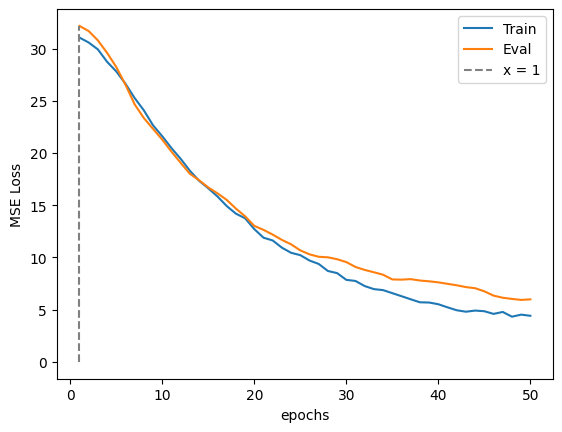

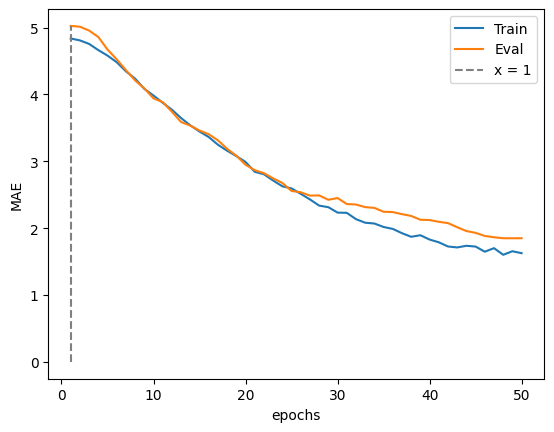

MAE on train set:  1.4153627311522048
min prediction: 0
max prediction: 9

MAE on test set:  1.8546511627906976
Error <= 3: 86.63 %
min prediction: 0
max prediction: 8


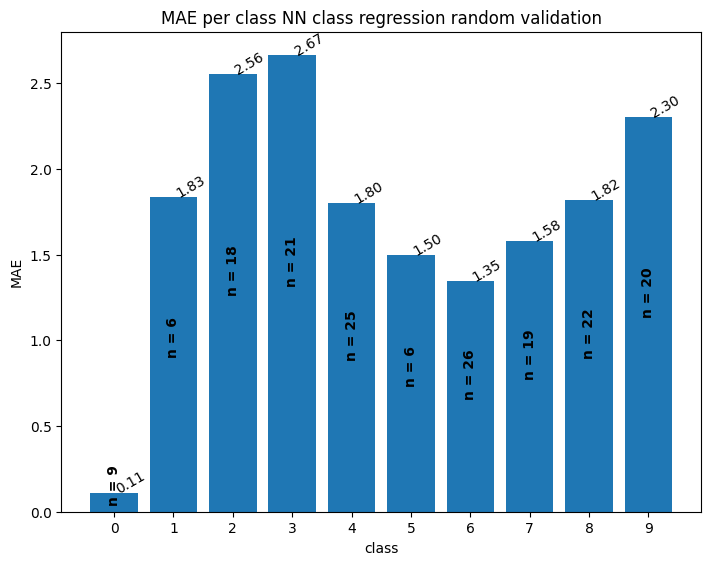

-----------|class error-MAE| difference-----------
mean: 0.6734494745021059
std: 0.5679182712390702
coefficient of variation (std/mean): 0.8432975193260683

----------normalized difference-------------
mean: 0.30766727261517535
std: 0.2594550477741945


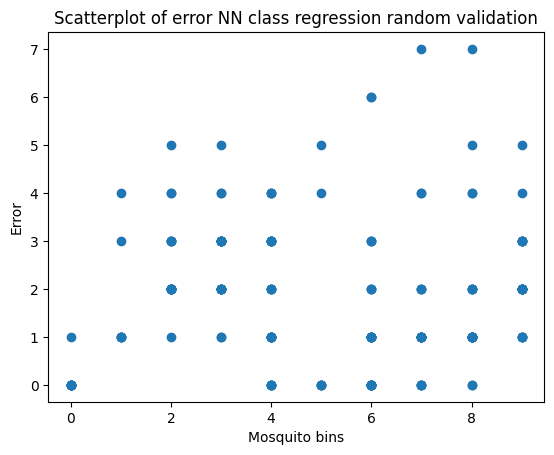

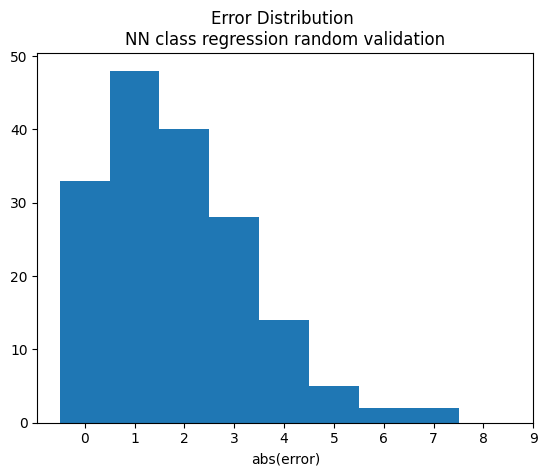

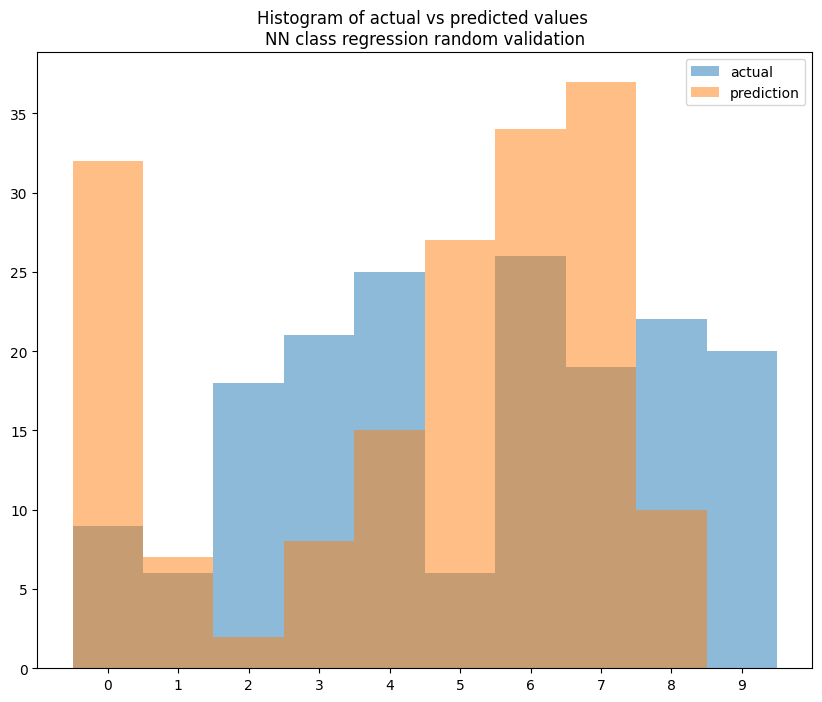

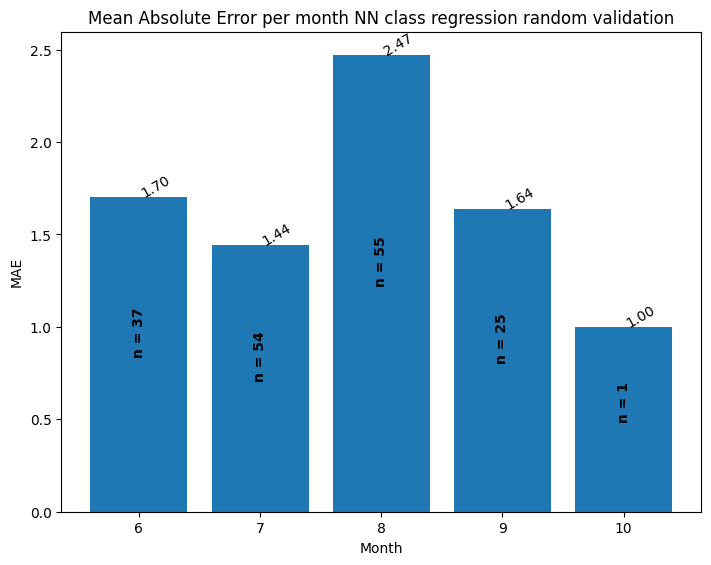

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 32.30823 | Val Loss: 32.17601 | Train Acc: 4.999| Val Acc: 4.862
Epoch 002: | Train Loss: 31.53074 | Val Loss: 31.93395 | Train Acc: 4.914| Val Acc: 4.862
Epoch 003: | Train Loss: 30.92744 | Val Loss: 31.28603 | Train Acc: 4.888| Val Acc: 4.828
Epoch 004: | Train Loss: 29.57980 | Val Loss: 30.30873 | Train Acc: 4.782| Val Acc: 4.678
Epoch 005: | Train Loss: 28.03463 | Val Loss: 29.22774 | Train Acc: 4.624| Val Acc: 4.621
Epoch 006: | Train Loss: 27.37614 | Val Loss: 28.21726 | Train Acc: 4.589| Val Acc: 4.494
Epoch 007: | Train Loss: 25.77745 | Val Loss: 27.45192 | Train Acc: 4.433| Val Acc: 4.448
Epoch 008: | Train Loss: 24.57928 | Val Loss: 26.32891 | Train Acc: 4.318| Val Acc: 4.345
Epoch 009: | Train Loss: 23.50859 | Val Loss: 25.45352 | Train Acc: 4.236| Val Acc: 4.253
Epoch 010: | Train Loss: 22.38397 | Val Loss: 24.47537 | Train Acc: 4.126| Val Acc: 4.126
Epoch 011: | Train Loss: 20.85334 | Val Loss: 23.88064 | Train Acc: 3.935| Val Acc: 4.103
Epoch 012:

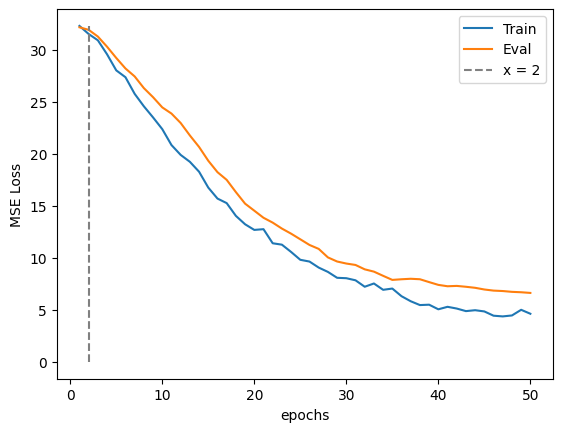

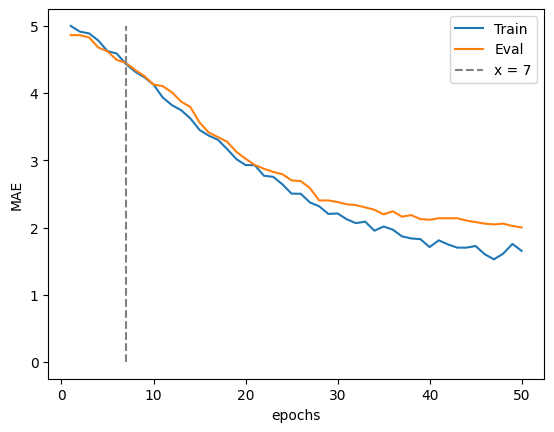

Epoch 001: | Train Loss: 30.79407 | Val Loss: 28.58094 | Train Acc: 4.773| Val Acc: 4.512
Epoch 002: | Train Loss: 30.02633 | Val Loss: 28.06462 | Train Acc: 4.704| Val Acc: 4.453
Epoch 003: | Train Loss: 29.71377 | Val Loss: 27.25356 | Train Acc: 4.715| Val Acc: 4.384
Epoch 004: | Train Loss: 27.91742 | Val Loss: 26.12784 | Train Acc: 4.578| Val Acc: 4.279
Epoch 005: | Train Loss: 27.03429 | Val Loss: 24.97921 | Train Acc: 4.457| Val Acc: 4.198
Epoch 006: | Train Loss: 26.07465 | Val Loss: 24.17821 | Train Acc: 4.342| Val Acc: 4.151
Epoch 007: | Train Loss: 24.20491 | Val Loss: 22.83139 | Train Acc: 4.211| Val Acc: 4.070
Epoch 008: | Train Loss: 23.01653 | Val Loss: 21.40416 | Train Acc: 4.114| Val Acc: 3.884
Epoch 009: | Train Loss: 21.85531 | Val Loss: 20.35912 | Train Acc: 4.025| Val Acc: 3.767
Epoch 010: | Train Loss: 20.12089 | Val Loss: 19.20914 | Train Acc: 3.812| Val Acc: 3.628
Epoch 011: | Train Loss: 19.18739 | Val Loss: 18.39167 | Train Acc: 3.729| Val Acc: 3.523
Epoch 012:

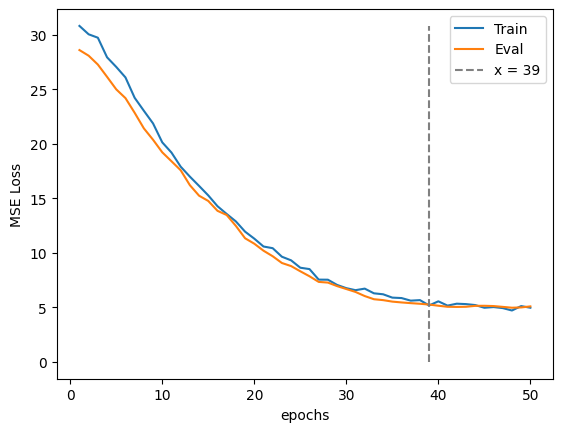

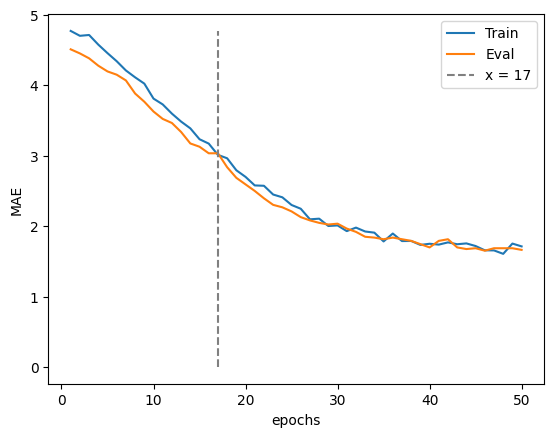

Epoch 001: | Train Loss: 30.71411 | Val Loss: 26.60781 | Train Acc: 4.799| Val Acc: 4.453
Epoch 002: | Train Loss: 30.03388 | Val Loss: 25.93727 | Train Acc: 4.733| Val Acc: 4.384
Epoch 003: | Train Loss: 28.82251 | Val Loss: 25.13356 | Train Acc: 4.626| Val Acc: 4.314
Epoch 004: | Train Loss: 27.86515 | Val Loss: 24.33905 | Train Acc: 4.581| Val Acc: 4.244
Epoch 005: | Train Loss: 27.17489 | Val Loss: 23.50045 | Train Acc: 4.484| Val Acc: 4.198
Epoch 006: | Train Loss: 25.50590 | Val Loss: 22.25519 | Train Acc: 4.352| Val Acc: 3.977
Epoch 007: | Train Loss: 24.23833 | Val Loss: 21.10582 | Train Acc: 4.254| Val Acc: 3.884
Epoch 008: | Train Loss: 23.23148 | Val Loss: 20.07345 | Train Acc: 4.165| Val Acc: 3.814
Epoch 009: | Train Loss: 21.47174 | Val Loss: 18.75604 | Train Acc: 3.990| Val Acc: 3.640
Epoch 010: | Train Loss: 20.88619 | Val Loss: 17.75838 | Train Acc: 3.900| Val Acc: 3.581
Epoch 011: | Train Loss: 19.80792 | Val Loss: 17.00606 | Train Acc: 3.792| Val Acc: 3.500
Epoch 012:

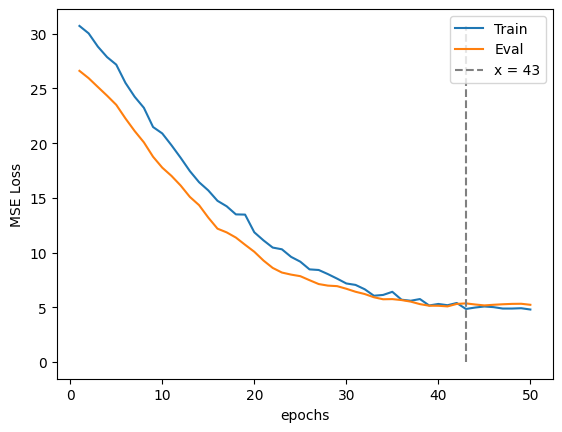

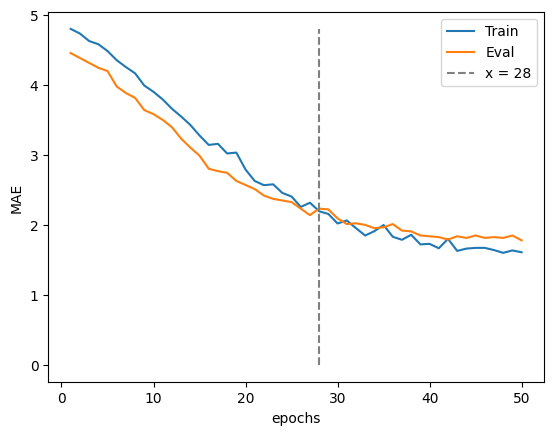

Epoch 001: | Train Loss: 31.26397 | Val Loss: 33.21405 | Train Acc: 4.912| Val Acc: 5.081
Epoch 002: | Train Loss: 30.82414 | Val Loss: 32.47572 | Train Acc: 4.864| Val Acc: 5.023
Epoch 003: | Train Loss: 29.79651 | Val Loss: 31.20214 | Train Acc: 4.799| Val Acc: 4.907
Epoch 004: | Train Loss: 28.70768 | Val Loss: 29.33124 | Train Acc: 4.684| Val Acc: 4.802
Epoch 005: | Train Loss: 27.90187 | Val Loss: 27.50609 | Train Acc: 4.591| Val Acc: 4.651
Epoch 006: | Train Loss: 26.03056 | Val Loss: 25.95958 | Train Acc: 4.413| Val Acc: 4.477
Epoch 007: | Train Loss: 24.89073 | Val Loss: 24.72236 | Train Acc: 4.348| Val Acc: 4.372
Epoch 008: | Train Loss: 23.96208 | Val Loss: 23.68330 | Train Acc: 4.205| Val Acc: 4.291
Epoch 009: | Train Loss: 22.40329 | Val Loss: 22.41851 | Train Acc: 4.030| Val Acc: 4.163
Epoch 010: | Train Loss: 21.90869 | Val Loss: 21.06570 | Train Acc: 4.027| Val Acc: 3.953
Epoch 011: | Train Loss: 20.79802 | Val Loss: 20.12360 | Train Acc: 3.862| Val Acc: 3.860
Epoch 012:

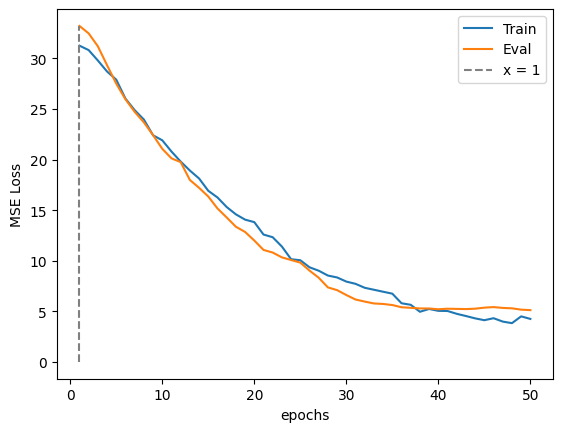

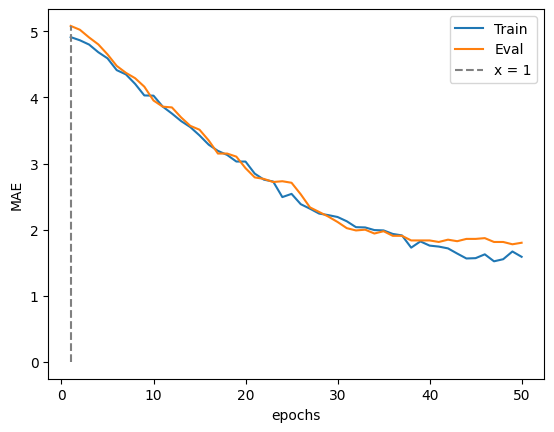

Epoch 001: | Train Loss: 31.86931 | Val Loss: 30.40014 | Train Acc: 4.881| Val Acc: 4.826
Epoch 002: | Train Loss: 31.29319 | Val Loss: 30.41613 | Train Acc: 4.853| Val Acc: 4.826
Epoch 003: | Train Loss: 30.46255 | Val Loss: 30.12872 | Train Acc: 4.762| Val Acc: 4.779
Epoch 004: | Train Loss: 29.51160 | Val Loss: 29.43060 | Train Acc: 4.691| Val Acc: 4.721
Epoch 005: | Train Loss: 28.34807 | Val Loss: 28.92181 | Train Acc: 4.572| Val Acc: 4.674
Epoch 006: | Train Loss: 26.72454 | Val Loss: 28.15354 | Train Acc: 4.456| Val Acc: 4.581
Epoch 007: | Train Loss: 25.81130 | Val Loss: 27.37467 | Train Acc: 4.348| Val Acc: 4.477
Epoch 008: | Train Loss: 24.53128 | Val Loss: 26.72696 | Train Acc: 4.270| Val Acc: 4.430
Epoch 009: | Train Loss: 23.55766 | Val Loss: 26.23078 | Train Acc: 4.132| Val Acc: 4.407
Epoch 010: | Train Loss: 22.20114 | Val Loss: 25.18380 | Train Acc: 4.008| Val Acc: 4.314
Epoch 011: | Train Loss: 21.00491 | Val Loss: 24.22167 | Train Acc: 3.877| Val Acc: 4.221
Epoch 012:

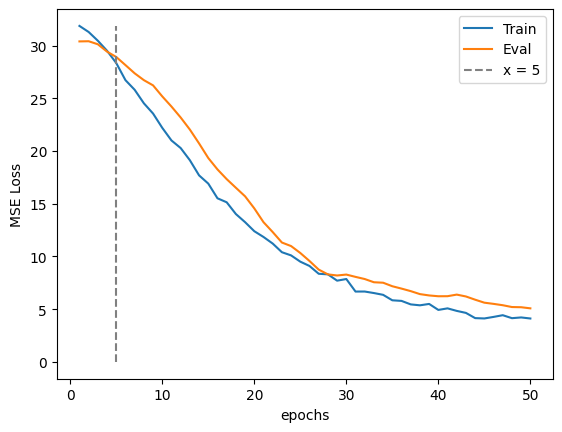

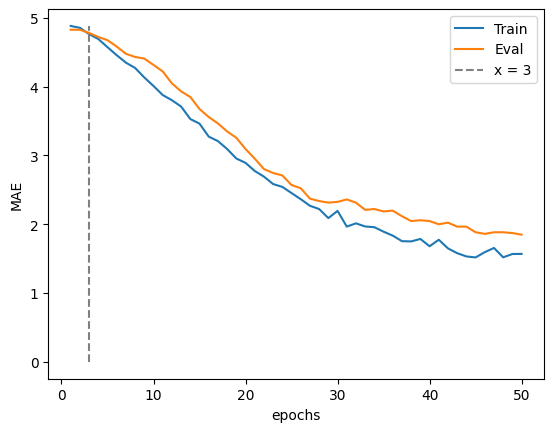

Epoch 001: | Train Loss: 32.60082 | Val Loss: 29.61215 | Train Acc: 5.048| Val Acc: 4.721
Epoch 002: | Train Loss: 31.95942 | Val Loss: 28.44829 | Train Acc: 5.019| Val Acc: 4.640
Epoch 003: | Train Loss: 30.76776 | Val Loss: 27.18757 | Train Acc: 4.907| Val Acc: 4.512
Epoch 004: | Train Loss: 29.63397 | Val Loss: 25.79173 | Train Acc: 4.793| Val Acc: 4.407
Epoch 005: | Train Loss: 28.53622 | Val Loss: 24.32640 | Train Acc: 4.700| Val Acc: 4.302
Epoch 006: | Train Loss: 27.28383 | Val Loss: 22.40249 | Train Acc: 4.543| Val Acc: 4.093
Epoch 007: | Train Loss: 26.40295 | Val Loss: 20.94256 | Train Acc: 4.515| Val Acc: 3.930
Epoch 008: | Train Loss: 24.89565 | Val Loss: 19.72638 | Train Acc: 4.323| Val Acc: 3.814
Epoch 009: | Train Loss: 23.48178 | Val Loss: 19.39070 | Train Acc: 4.182| Val Acc: 3.779
Epoch 010: | Train Loss: 22.63259 | Val Loss: 18.75775 | Train Acc: 4.104| Val Acc: 3.674
Epoch 011: | Train Loss: 21.06650 | Val Loss: 18.43961 | Train Acc: 3.964| Val Acc: 3.640
Epoch 012:

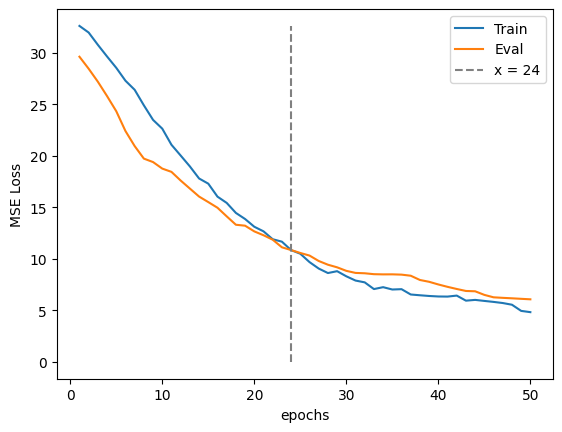

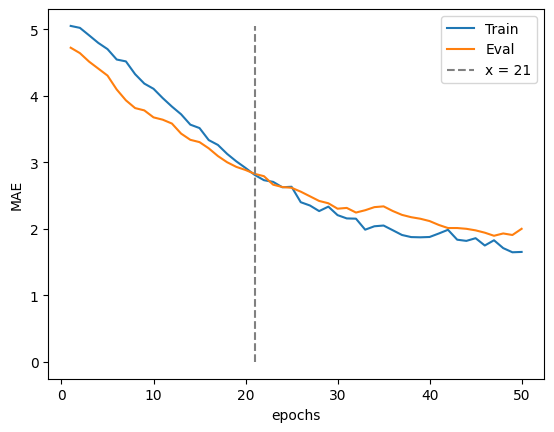

Epoch 001: | Train Loss: 30.46308 | Val Loss: 31.33708 | Train Acc: 4.806| Val Acc: 4.930
Epoch 002: | Train Loss: 30.33966 | Val Loss: 30.61048 | Train Acc: 4.811| Val Acc: 4.895
Epoch 003: | Train Loss: 29.32573 | Val Loss: 29.50295 | Train Acc: 4.711| Val Acc: 4.802
Epoch 004: | Train Loss: 28.77092 | Val Loss: 28.18037 | Train Acc: 4.652| Val Acc: 4.663
Epoch 005: | Train Loss: 27.82028 | Val Loss: 26.60615 | Train Acc: 4.597| Val Acc: 4.523
Epoch 006: | Train Loss: 26.59396 | Val Loss: 25.22785 | Train Acc: 4.440| Val Acc: 4.372
Epoch 007: | Train Loss: 25.40299 | Val Loss: 23.71805 | Train Acc: 4.296| Val Acc: 4.221
Epoch 008: | Train Loss: 23.95212 | Val Loss: 22.16905 | Train Acc: 4.214| Val Acc: 4.047
Epoch 009: | Train Loss: 22.90757 | Val Loss: 21.24086 | Train Acc: 4.073| Val Acc: 3.965
Epoch 010: | Train Loss: 21.02784 | Val Loss: 19.15653 | Train Acc: 3.934| Val Acc: 3.756
Epoch 011: | Train Loss: 20.51638 | Val Loss: 18.34834 | Train Acc: 3.878| Val Acc: 3.628
Epoch 012:

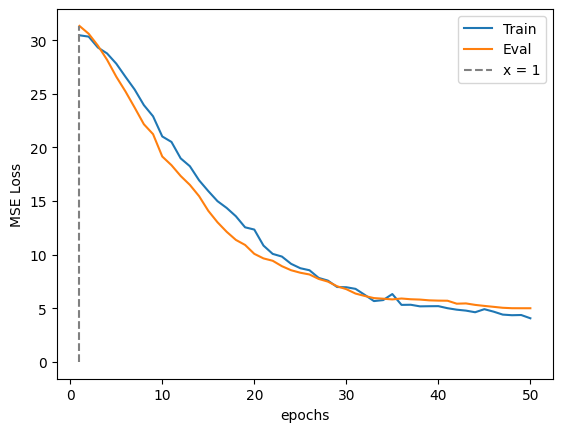

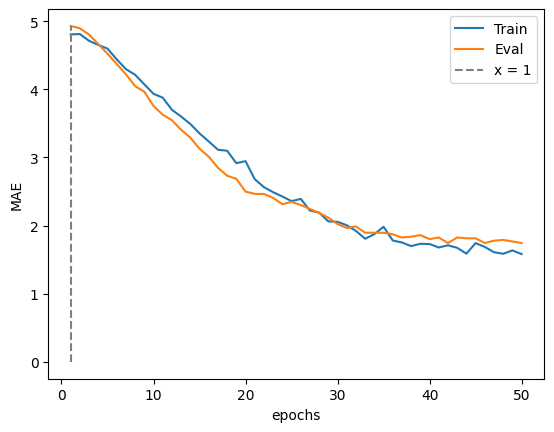

Epoch 001: | Train Loss: 32.24577 | Val Loss: 34.17424 | Train Acc: 4.915| Val Acc: 5.221
Epoch 002: | Train Loss: 31.76996 | Val Loss: 33.44169 | Train Acc: 4.894| Val Acc: 5.128
Epoch 003: | Train Loss: 30.84397 | Val Loss: 32.62329 | Train Acc: 4.805| Val Acc: 5.116
Epoch 004: | Train Loss: 29.87114 | Val Loss: 31.41628 | Train Acc: 4.743| Val Acc: 4.988
Epoch 005: | Train Loss: 29.19067 | Val Loss: 30.23114 | Train Acc: 4.652| Val Acc: 4.895
Epoch 006: | Train Loss: 27.18695 | Val Loss: 29.01916 | Train Acc: 4.539| Val Acc: 4.791
Epoch 007: | Train Loss: 26.41023 | Val Loss: 27.92203 | Train Acc: 4.405| Val Acc: 4.686
Epoch 008: | Train Loss: 25.40755 | Val Loss: 26.62588 | Train Acc: 4.318| Val Acc: 4.581
Epoch 009: | Train Loss: 23.55293 | Val Loss: 24.91914 | Train Acc: 4.126| Val Acc: 4.349
Epoch 010: | Train Loss: 22.53922 | Val Loss: 24.21964 | Train Acc: 4.046| Val Acc: 4.349
Epoch 011: | Train Loss: 21.63687 | Val Loss: 22.93486 | Train Acc: 3.926| Val Acc: 4.151
Epoch 012:

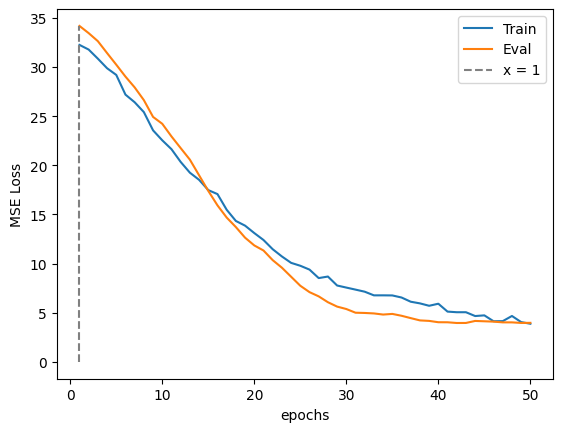

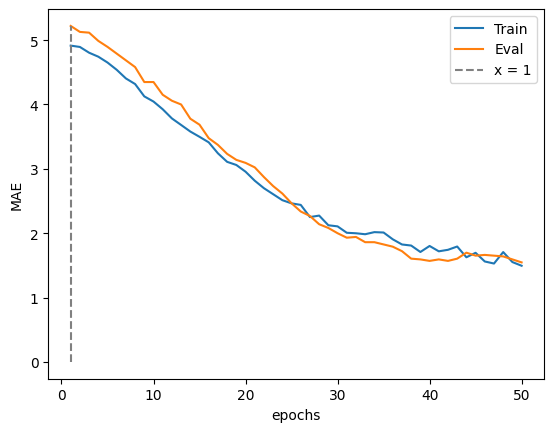

Epoch 001: | Train Loss: 32.89158 | Val Loss: 32.85098 | Train Acc: 5.030| Val Acc: 5.140
Epoch 002: | Train Loss: 31.92322 | Val Loss: 32.60210 | Train Acc: 4.979| Val Acc: 5.105
Epoch 003: | Train Loss: 31.74084 | Val Loss: 31.78807 | Train Acc: 4.942| Val Acc: 5.070
Epoch 004: | Train Loss: 30.31517 | Val Loss: 30.98612 | Train Acc: 4.850| Val Acc: 4.977
Epoch 005: | Train Loss: 29.36187 | Val Loss: 29.57656 | Train Acc: 4.735| Val Acc: 4.849
Epoch 006: | Train Loss: 27.88506 | Val Loss: 28.10796 | Train Acc: 4.591| Val Acc: 4.709
Epoch 007: | Train Loss: 26.69707 | Val Loss: 26.60173 | Train Acc: 4.489| Val Acc: 4.512
Epoch 008: | Train Loss: 24.91040 | Val Loss: 24.44317 | Train Acc: 4.330| Val Acc: 4.384
Epoch 009: | Train Loss: 24.27346 | Val Loss: 23.06364 | Train Acc: 4.248| Val Acc: 4.221
Epoch 010: | Train Loss: 22.80539 | Val Loss: 21.94031 | Train Acc: 4.122| Val Acc: 4.081
Epoch 011: | Train Loss: 21.53341 | Val Loss: 21.17551 | Train Acc: 4.056| Val Acc: 3.953
Epoch 012:

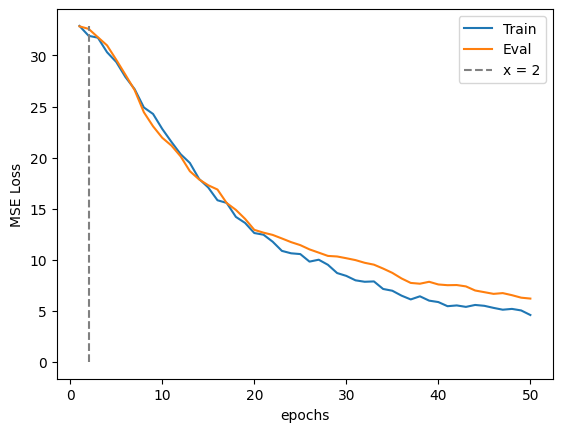

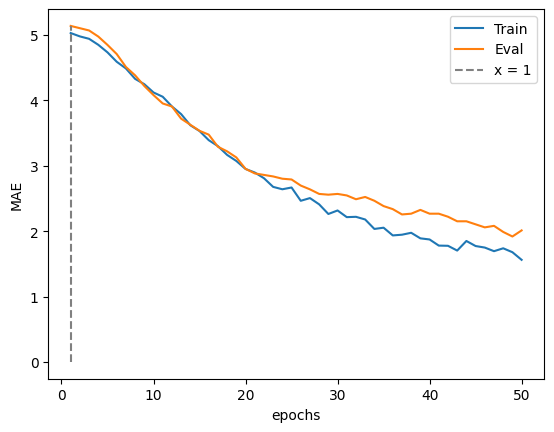

Epoch 001: | Train Loss: 29.94357 | Val Loss: 36.22124 | Train Acc: 4.780| Val Acc: 5.337
Epoch 002: | Train Loss: 29.68253 | Val Loss: 35.76407 | Train Acc: 4.772| Val Acc: 5.326
Epoch 003: | Train Loss: 28.58488 | Val Loss: 34.02472 | Train Acc: 4.659| Val Acc: 5.186
Epoch 004: | Train Loss: 27.62038 | Val Loss: 32.51227 | Train Acc: 4.561| Val Acc: 5.081
Epoch 005: | Train Loss: 26.55429 | Val Loss: 30.68164 | Train Acc: 4.520| Val Acc: 4.895
Epoch 006: | Train Loss: 25.19492 | Val Loss: 29.45626 | Train Acc: 4.346| Val Acc: 4.779
Epoch 007: | Train Loss: 23.81662 | Val Loss: 27.53194 | Train Acc: 4.239| Val Acc: 4.628
Epoch 008: | Train Loss: 22.68889 | Val Loss: 26.42869 | Train Acc: 4.098| Val Acc: 4.512
Epoch 009: | Train Loss: 21.84571 | Val Loss: 24.81692 | Train Acc: 4.024| Val Acc: 4.349
Epoch 010: | Train Loss: 20.51698 | Val Loss: 23.55058 | Train Acc: 3.858| Val Acc: 4.244
Epoch 011: | Train Loss: 19.43462 | Val Loss: 21.97847 | Train Acc: 3.726| Val Acc: 4.070
Epoch 012:

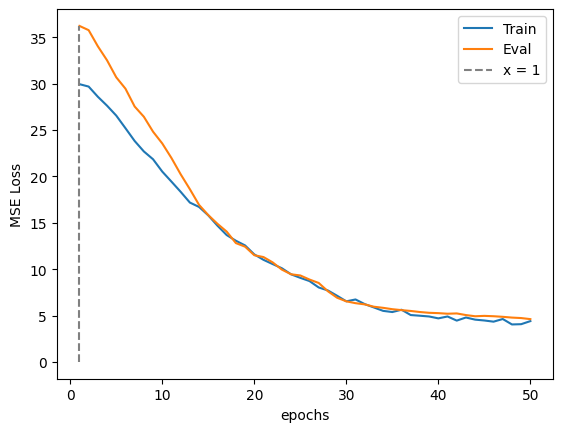

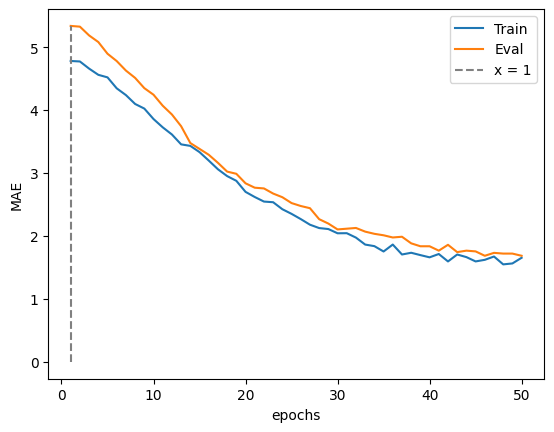

MAE on train set:  1.401729255387792
min prediction: 0
max prediction: 9

MAE on test set:  1.8083623693379791
Error <= 3: 87.11 %
min prediction: 0
max prediction: 9


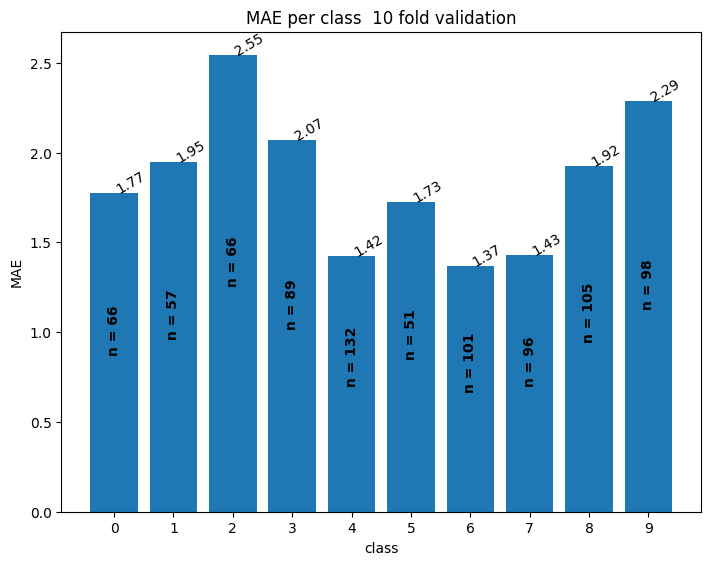

-----------|class error-MAE| difference-----------
mean: 0.4890981010210482
std: 0.2949653491675722
coefficient of variation (std/mean): 0.6030801357678517

----------normalized difference-------------
mean: 0.5319882421875095
std: 0.320831541325344


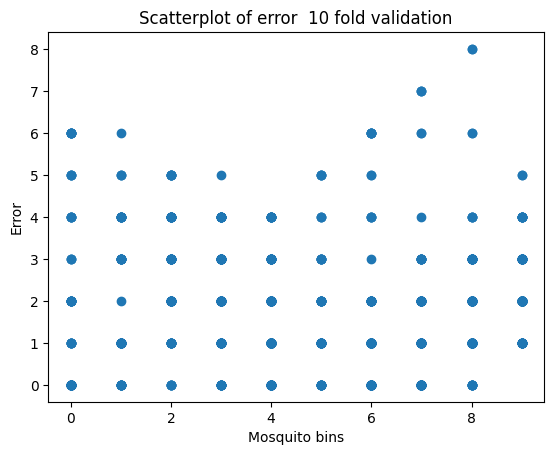

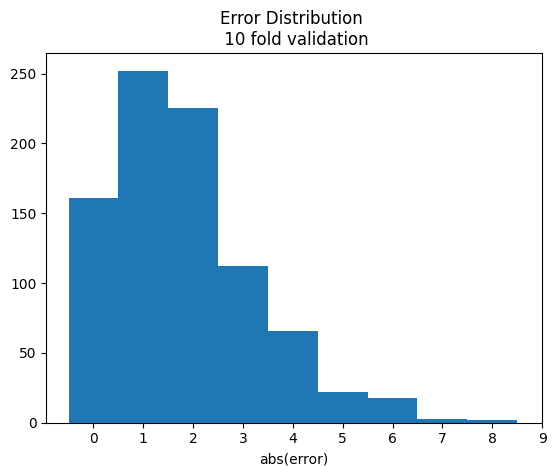

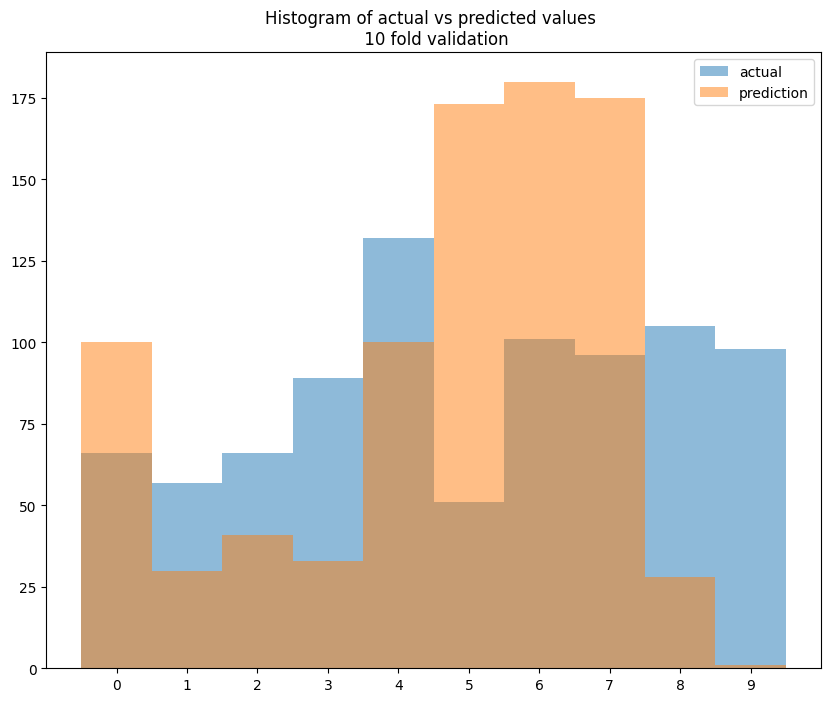

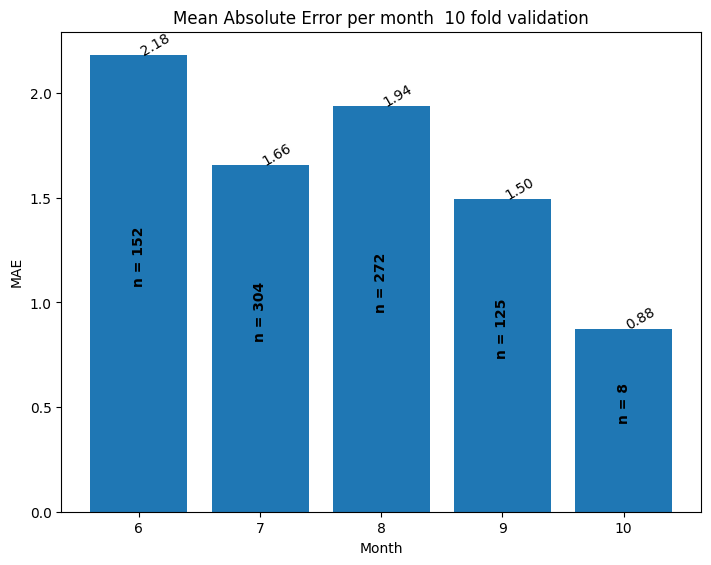

In [9]:
train_model_KFold(data, model, date_col=date_col)

Epoch 001: | Train Loss: 32.83849 | Val Loss: 21.49231 | Train Acc: 5.061| Val Acc: 3.954
Epoch 002: | Train Loss: 32.28799 | Val Loss: 21.49231 | Train Acc: 5.008| Val Acc: 3.954
Epoch 003: | Train Loss: 31.31843 | Val Loss: 21.49231 | Train Acc: 4.927| Val Acc: 3.954
Epoch 004: | Train Loss: 30.32469 | Val Loss: 21.49231 | Train Acc: 4.836| Val Acc: 3.954
Epoch 005: | Train Loss: 29.02385 | Val Loss: 21.49231 | Train Acc: 4.708| Val Acc: 3.954
Epoch 006: | Train Loss: 27.86424 | Val Loss: 21.49231 | Train Acc: 4.618| Val Acc: 3.954
Epoch 007: | Train Loss: 26.65120 | Val Loss: 21.49231 | Train Acc: 4.499| Val Acc: 3.954
Epoch 008: | Train Loss: 25.36009 | Val Loss: 21.49231 | Train Acc: 4.379| Val Acc: 3.954
Epoch 009: | Train Loss: 24.52724 | Val Loss: 21.49231 | Train Acc: 4.315| Val Acc: 3.954
Epoch 010: | Train Loss: 23.14499 | Val Loss: 21.47844 | Train Acc: 4.152| Val Acc: 3.954
Epoch 011: | Train Loss: 21.99176 | Val Loss: 21.45633 | Train Acc: 4.036| Val Acc: 3.938
Epoch 012:

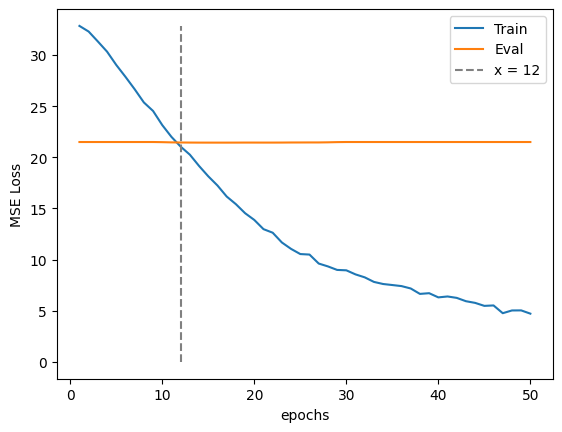

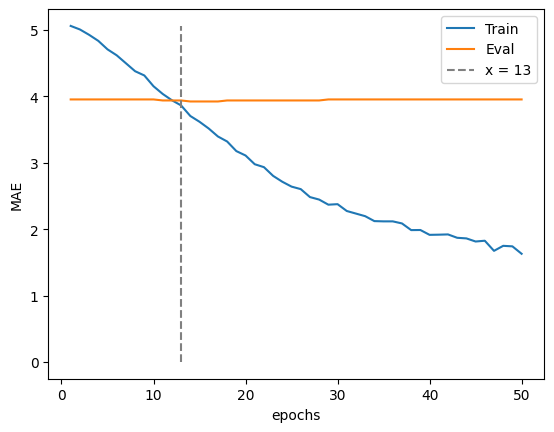

Epoch 001: | Train Loss: 5.72891 | Val Loss: 7.19089 | Train Acc: 1.872| Val Acc: 1.964
Epoch 002: | Train Loss: 5.32832 | Val Loss: 7.12369 | Train Acc: 1.800| Val Acc: 2.000
Epoch 003: | Train Loss: 4.91894 | Val Loss: 6.82527 | Train Acc: 1.737| Val Acc: 1.929
Epoch 004: | Train Loss: 5.00230 | Val Loss: 6.30274 | Train Acc: 1.757| Val Acc: 1.786
Epoch 005: | Train Loss: 4.90162 | Val Loss: 6.51644 | Train Acc: 1.757| Val Acc: 1.893
Epoch 006: | Train Loss: 4.49789 | Val Loss: 6.47953 | Train Acc: 1.654| Val Acc: 2.000
Epoch 007: | Train Loss: 4.01975 | Val Loss: 6.31784 | Train Acc: 1.589| Val Acc: 1.929
Epoch 008: | Train Loss: 4.06110 | Val Loss: 6.33143 | Train Acc: 1.580| Val Acc: 1.964
Epoch 009: | Train Loss: 4.09089 | Val Loss: 5.98353 | Train Acc: 1.573| Val Acc: 1.893
Epoch 010: | Train Loss: 3.79369 | Val Loss: 5.95679 | Train Acc: 1.548| Val Acc: 1.929
Epoch 011: | Train Loss: 4.20052 | Val Loss: 5.97991 | Train Acc: 1.581| Val Acc: 1.929
Epoch 012: | Train Loss: 3.75705

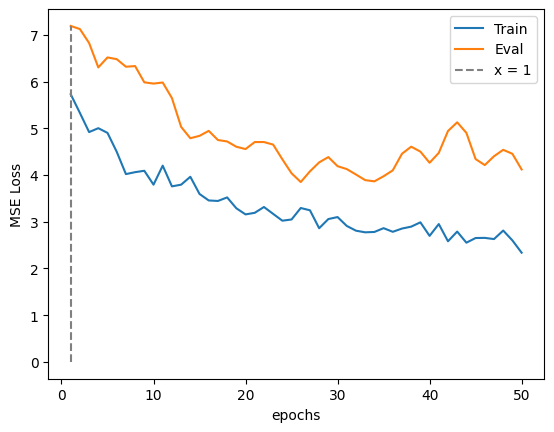

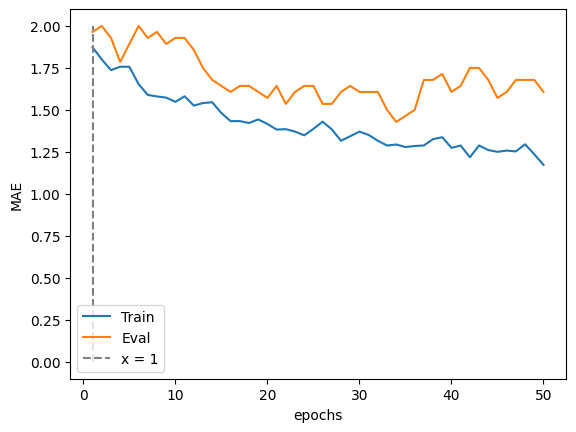

MAE on train set:  1.1611492816989382
min prediction: 0
max prediction: 9

MAE on test set:  3.247311827956989
Error <= 3: 62.37 %
min prediction: 0
max prediction: 6


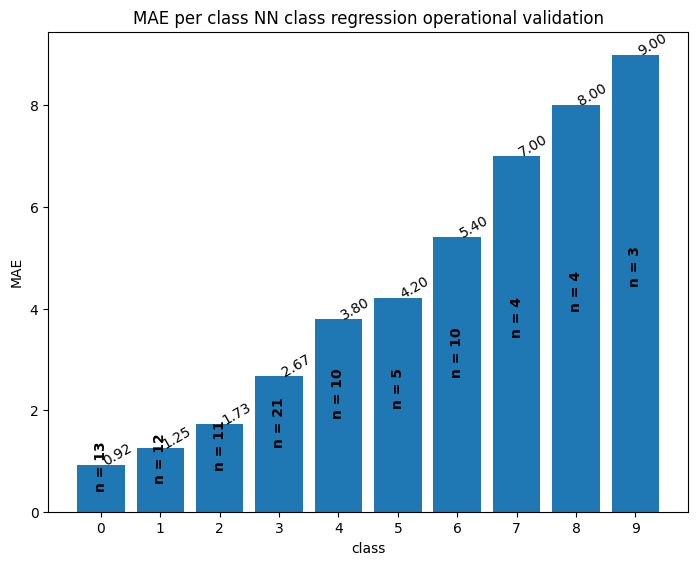

-----------|class error-MAE| difference-----------
mean: 4.603298368298368
std: 2.7283566630726734
coefficient of variation (std/mean): 0.5926960289739428

----------normalized difference-------------
mean: 0.569932178932179
std: 0.3377965392375691


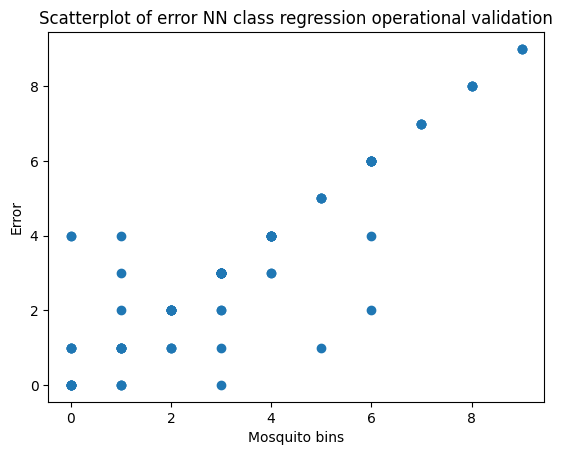

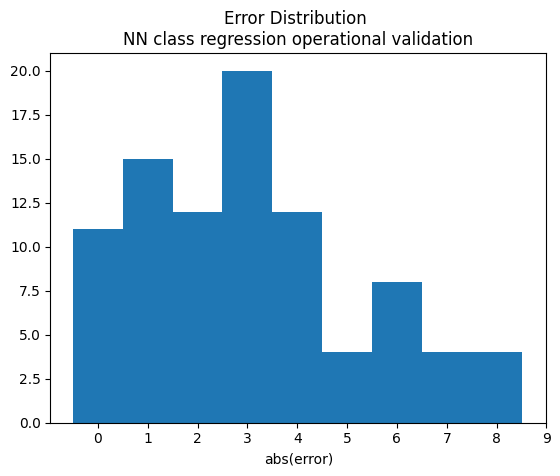

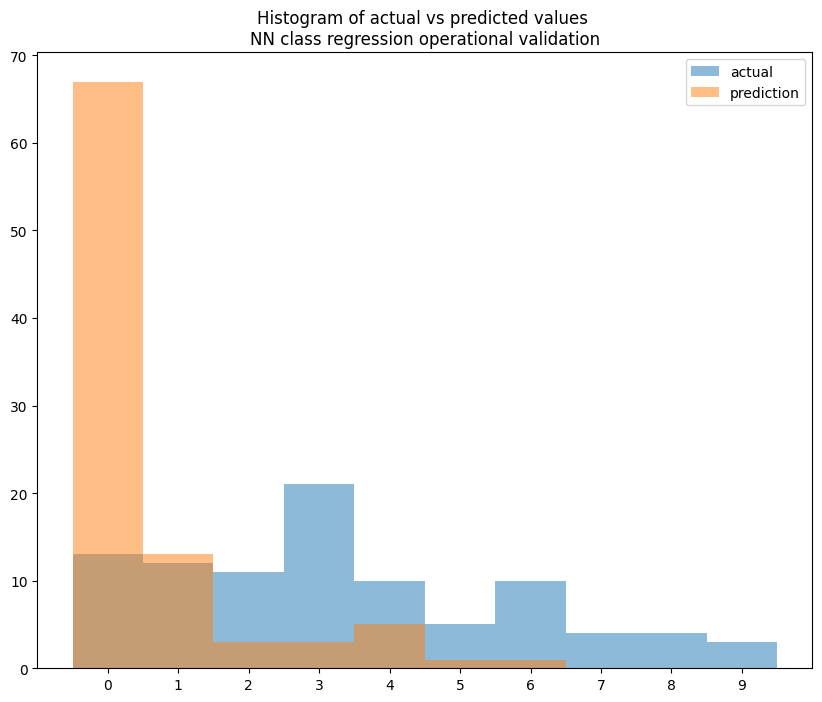

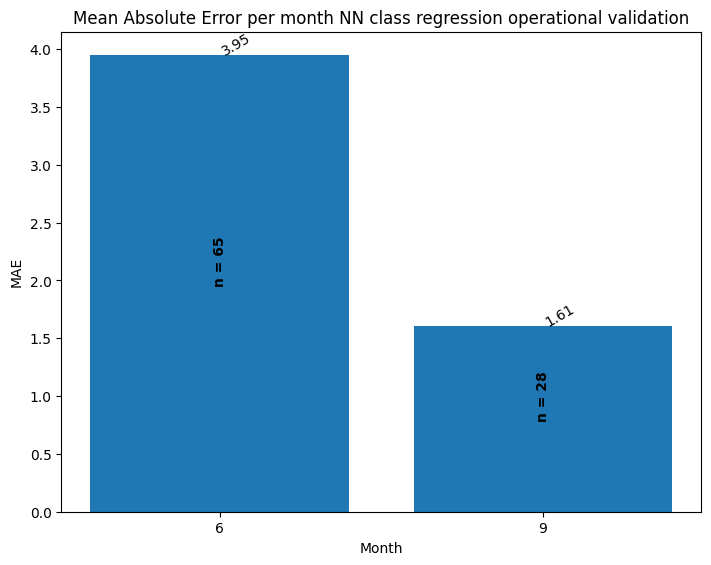

In [10]:
operational_validation(data, model, date='2022-01-01', filepath=path, date_col=date_col, case=case_title, export=exp)